In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data_final/european_forest_data.csv')

# Rename columns
filtered_df = df.rename(columns={'Country Name': 'Country'})
                                 
# Filter for only needed columns
relevant_columns = ['Country', '2019', '2020', '2021', '2022', '2023']
filtered_df = filtered_df[relevant_columns]

# Sort
filtered_df = filtered_df.sort_values(by='Country')
filtered_df.head()


,Country,2019,2020,2021,2022,2023
0,Albania,28.791971,28.791971,28.791971,28.791971,NaN
1,Andorra,34.042553,34.042553,34.042553,34.042553,NaN
2,Armenia,11.544784,11.537408,11.530032,11.522655,NaN
3,Austria,47.103732,47.137906,47.172079,47.206132,NaN
4,Azerbaijan,13.553367,13.694190,13.832991,13.972482,NaN


In [71]:
print(f'Data shape: {filtered_df.shape[0]} rows, {filtered_df.shape[1]} columns')

Data shape: 49 rows, 6 columns


In [72]:
# Get the distinct countries
distinct_countries_count = filtered_df['Country'].nunique()
distinct_countries = filtered_df['Country'].unique()

# Display the result
print(f'There are {distinct_countries_count} countries in the dataset')
print(f'Countries: {distinct_countries}')



There are 49 countries in the dataset
Countries: ['Albania' 'Andorra' 'Armenia' 'Austria' 'Azerbaijan' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia'
 'Denmark' 'Estonia' 'Finland' 'France' 'Georgia' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Kosovo' 'Latvia' 'Liechtenstein'
 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Monaco' 'Montenegro'
 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russian Federation' 'San Marino' 'Serbia' 'Slovak Republic' 'Slovenia'
 'Spain' 'Sweden' 'Switzerland' 'Turkiye' 'Ukraine' 'United Kingdom']


In [73]:
# Rename countries to match the names from other datasets
country_mapping = {
    'Turkiye': 'Turkey',
    'Slovak Republic': 'Slovakia',
    'Czechia': 'Czech Republic'
}

filtered_df['Country'] = filtered_df['Country'].replace(country_mapping)

In [75]:
# Get the distinct countries
distinct_countries = filtered_df['Country'].unique()

# Display the result
print(f'Countries: {distinct_countries}')

Countries: ['Albania' 'Andorra' 'Armenia' 'Austria' 'Azerbaijan' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Georgia' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Kosovo' 'Latvia' 'Liechtenstein'
 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Monaco' 'Montenegro'
 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russian Federation' 'San Marino' 'Serbia' 'Slovakia' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'Turkey' 'Ukraine' 'United Kingdom']


In [76]:
filtered_df.describe()

,2019,2020,2021,2022,2023
count,48.000000,48.000000,48.000000,48.000000,0.0
mean,31.932638,31.986010,32.011622,32.038870,NaN
std,17.021385,17.013994,17.007906,17.001314,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN
25%,18.184142,18.185108,18.186073,18.187039,NaN
50%,32.424823,32.530243,32.606787,32.699007,NaN
75%,40.196096,40.196096,40.196096,40.196096,NaN
max,73.730793,73.728367,73.726500,73.726500,NaN


Country     0
2019        1
2020        1
2021        1
2022        1
2023       49
dtype: int64

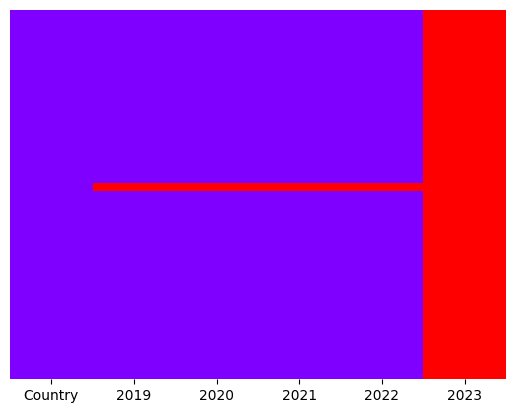

In [60]:
# Display null values
sns.heatmap(filtered_df.isnull(), yticklabels = False, cbar = False, cmap = 'rainbow')

# Count null values
filtered_df.isnull().sum()

In [77]:
# Find rows with  null values
null_rows = filtered_df[filtered_df['2019'].isnull()]
null_rows

# Display rows with null values
print("Rows with values':")
print(null_rows)

Rows with values':
   Country  2019  2020  2021  2022  2023
48  Kosovo   NaN   NaN   NaN   NaN   NaN


In [78]:
# Drop rows for Kosovo
countries_to_drop = ['Kosovo']

filtered_df_w_dropped_countries = filtered_df[~filtered_df['Country'].isin(countries_to_drop)]
filtered_df_w_dropped_countries.tail()


,Country,2019,2020,2021,2022,2023
45,Sweden,68.699666,68.699666,68.699666,68.699666,NaN
9,Switzerland,32.034469,32.121536,32.208603,32.295671,NaN
46,Turkey,28.668789,28.871484,29.074179,29.276873,NaN
47,Ukraine,16.713842,16.724197,16.734553,16.744909,NaN
18,United Kingdom,13.152565,13.185632,13.221455,13.255487,NaN


In [79]:
# Drop rows for 2023 (TO DO add prediction later)
years_to_drop = ['2023']

filtered_df_w_dropped_countries = filtered_df_w_dropped_countries.drop('2023', axis=1)
filtered_df_w_dropped_countries.head()


,Country,2019,2020,2021,2022
0,Albania,28.791971,28.791971,28.791971,28.791971
1,Andorra,34.042553,34.042553,34.042553,34.042553
2,Armenia,11.544784,11.537408,11.530032,11.522655
3,Austria,47.103732,47.137906,47.172079,47.206132
4,Azerbaijan,13.553367,13.694190,13.832991,13.972482


In [64]:
# Save file for using for forecast
filtered_df_w_dropped_countries.to_csv('../data_for_forecast/forest-area-clean.csv', index=False)
filtered_df_w_dropped_countries.head()

,Country,2019,2020,2021,2022
0,Albania,28.791971,28.791971,28.791971,28.791971
1,Andorra,34.042553,34.042553,34.042553,34.042553
2,Armenia,11.544784,11.537408,11.530032,11.522655
3,Austria,47.103732,47.137906,47.172079,47.206132
4,Azerbaijan,13.553367,13.694190,13.832991,13.972482


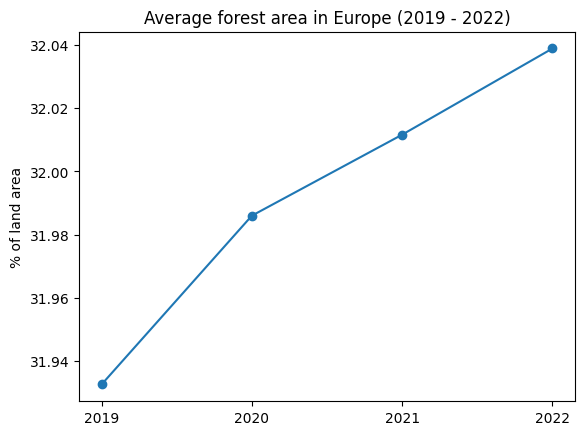

In [80]:
# TREND ANALYSIS OVER TIME - FOREST AREA OVER THE YEARS
years = ['2019','2020','2021','2022']

yearly_total_forest_area = filtered_df_w_dropped_countries[years].mean(axis=0)
plt.plot(yearly_total_forest_area.index, yearly_total_forest_area.values, marker='o')
plt.title('Average forest area in Europe (2019 - 2022)')
plt.ylabel('% of land area')
plt.show()


                   Country       2019       2020       2021       2022  \
16                 Finland  73.730793  73.728367  73.726500  73.726500   
45                  Sweden  68.699666  68.699666  68.699666  68.699666   
34              Montenegro  61.486989  61.486989  61.486989  61.486989   
44                Slovenia  61.573072  61.472259  61.371114  61.270192   
15                 Estonia  57.038596  57.038596  57.038596  57.065294   
29                  Latvia  54.749867  54.809417  54.871605  54.933794   
40      Russian Federation  49.784336  49.784336  49.784336  49.784336   
3                  Austria  47.103732  47.137906  47.172079  47.206132   
8                  Belarus  43.126155  43.194403  43.272235  43.335140   
7   Bosnia and Herzegovina  42.732617  42.732617  42.732617  42.732617   

    Forest area (avg)  
16          73.728040  
45          68.699666  
34          61.486989  
44          61.421659  
15          57.045271  
29          54.841171  
40          49.78

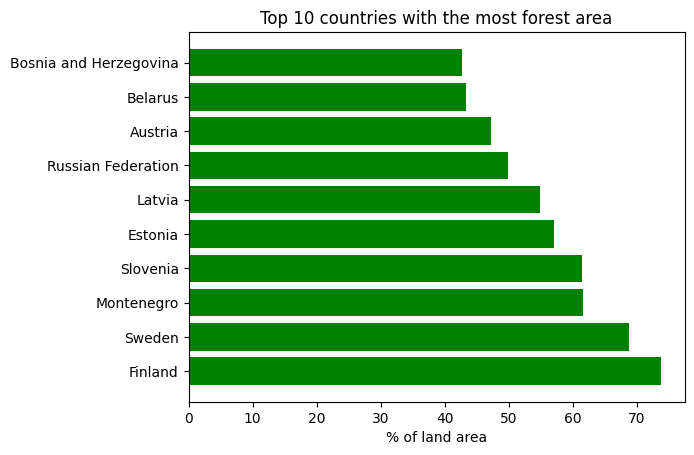

In [81]:
# TOP COUNTRIES WITH THE MOST FOREST AREA

# Find mean value for every country
filtered_df_w_dropped_countries['Forest area (avg)'] = filtered_df_w_dropped_countries.mean(axis=1,numeric_only=True)

# Sort countries by forest area (DESC)
top_countries = filtered_df_w_dropped_countries.sort_values(by='Forest area (avg)', ascending=False)

# Display
print(top_countries.head(10))

# Plot the top 10 countries
plt.barh(top_countries['Country'][:10], top_countries['Forest area (avg)'][:10], color='green')
plt.title('Top 10 countries with the most forest area')
plt.xlabel('% of land area')
plt.show()



           Country       2019       2020       2021       2022  \
30          Monaco   0.000000   0.000000   0.000000   0.000000   
24         Iceland   0.502727   0.509273   0.515720   0.522265   
33           Malta   1.437500   1.437500   1.437500   1.437500   
35     Netherlands  10.946540  10.974161  11.001981  11.029667   
23         Ireland  11.293657  11.351720  11.409784  11.467847   
2          Armenia  11.544784  11.537408  11.530032  11.522655   
31         Moldova  11.752757  11.753222  11.722778  11.751292   
18  United Kingdom  13.152565  13.185632  13.221455  13.255487   
4       Azerbaijan  13.553367  13.694190  13.832991  13.972482   
13         Denmark  15.687500  15.711000  15.734500  15.758000   

    Forest area (avg)  
30           0.000000  
24           0.512496  
33           1.437500  
35          10.988087  
23          11.380752  
2           11.533720  
31          11.745012  
18          13.203785  
4           13.763257  
13          15.722750  


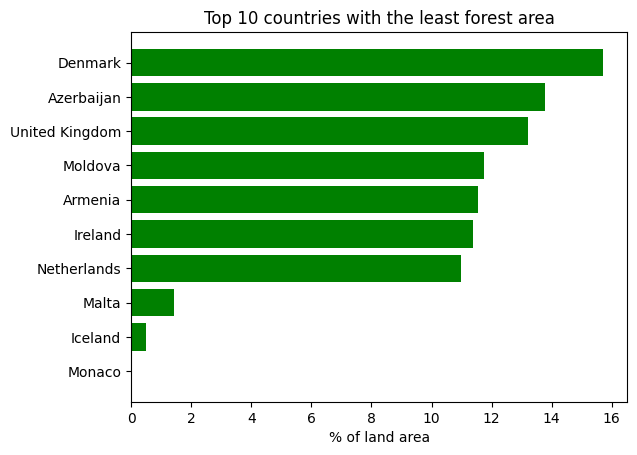

In [82]:
# TOP COUNTRIES WITH THE LEAST FOREST AREA

# Find mean value for every country
filtered_df_w_dropped_countries['Forest area (avg)'] = filtered_df_w_dropped_countries.mean(axis=1,numeric_only=True)

# Sort countries by forest area (ASC)
top_countries = filtered_df_w_dropped_countries.sort_values(by='Forest area (avg)', ascending=True)

# Display
print(top_countries.head(10))

# Plot the top 10 countries
plt.barh(top_countries['Country'][:10], top_countries['Forest area (avg)'][:10], color='green')
plt.title('Top 10 countries with the least forest area')
plt.xlabel('% of land area')
plt.show()


In [83]:
# Forest area sustainability score - higher % of forest area -> better sustainability 

filtered_df_w_dropped_countries['Forest area (avg)'] = filtered_df_w_dropped_countries[years].mean(axis=1)

avg_forest_area = filtered_df_w_dropped_countries[['Country','Forest area (avg)']].copy()

#  Normalize the average values (0 = worst, 1 = best)
max_val = avg_forest_area['Forest area (avg)'].max()
min_val = avg_forest_area['Forest area (avg)'].min()

avg_forest_area['forest_area_subindex'] = (avg_forest_area['Forest area (avg)'] - min_val) / (max_val - min_val)

# Sort 
avg_forest_area.sort_values(by='forest_area_subindex', ascending=False)



,Country,Forest area (avg),forest_area_subindex
16,Finland,73.728040,1.000000
45,Sweden,68.699666,0.931798
34,Montenegro,61.486989,0.833970
44,Slovenia,61.421659,0.833084
15,Estonia,57.045271,0.773726
29,Latvia,54.841171,0.743831
40,Russian Federation,49.784336,0.675243
3,Austria,47.154962,0.639580
8,Belarus,43.231983,0.586371
7,Bosnia and Herzegovina,42.732617,0.579598


In [84]:
avg_forest_area.to_csv('../data_subindex/subindex_forest_ares_2019-2022.csv', index=False)

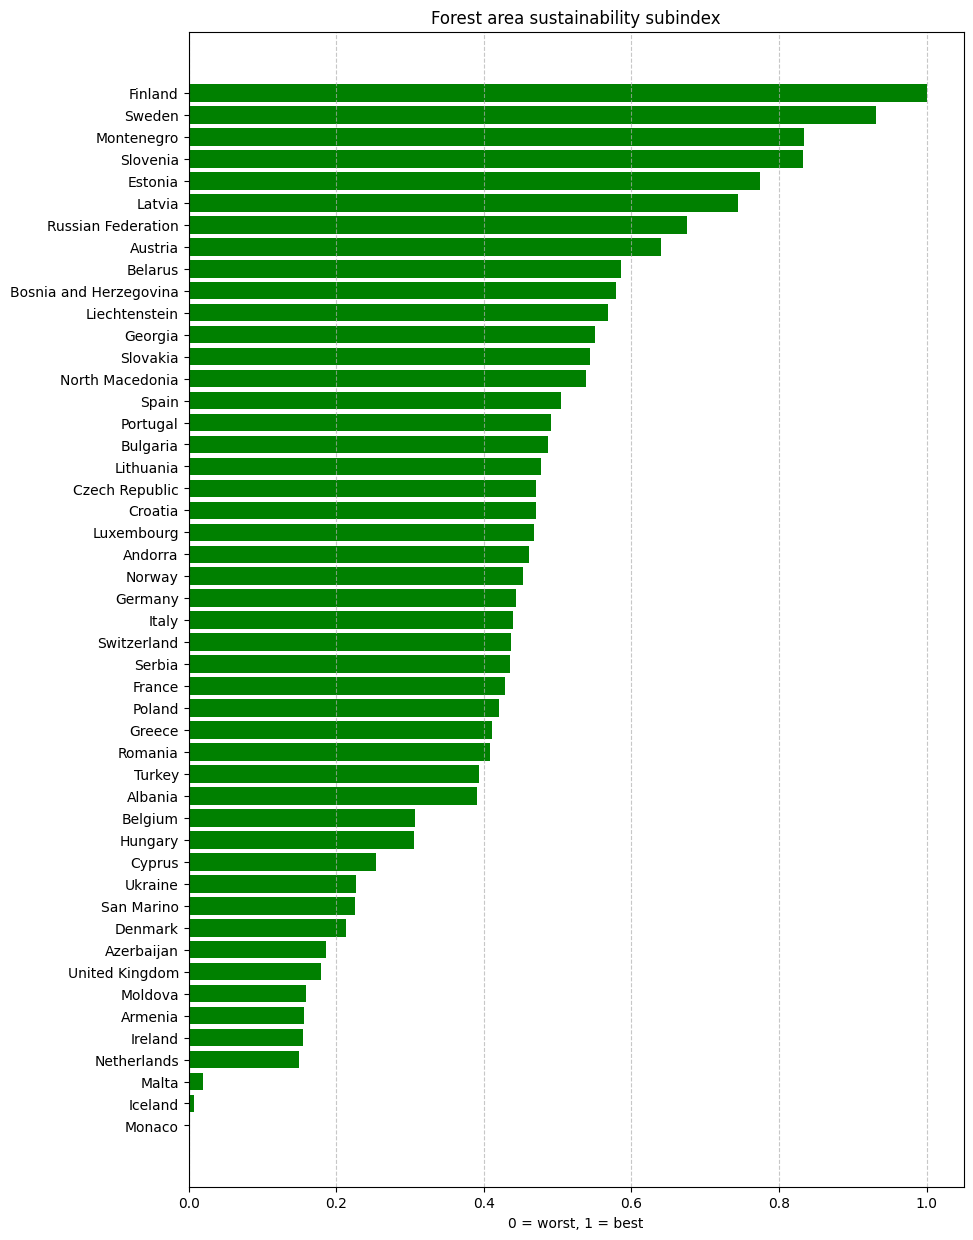

In [86]:
# Plot

avg_forest_area = avg_forest_area.sort_values(by='forest_area_subindex')

plt.figure(figsize=(10,15))
plt.barh(avg_forest_area['Country'],avg_forest_area['forest_area_subindex'], color='green')
plt.xlabel('0 = worst, 1 = best')
plt.title('Forest area sustainability subindex')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()